In [1]:
import yfinance as yf
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 


In [2]:
#stock_list = yf.Ticker["ANZ.AX", "WBC.AX", "CBA.AX", "NAB.AX", "MQG.AX"]

In [3]:
#hist = stock_list.history

In [21]:
fin_stk_daily = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "ANZ.AX WBC.AX CBA.AX NAB.AX MQG.AX",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "2y",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )
fin_stk_qrtly = yf.download(tickers = "ANZ.AX WBC.AX CBA.AX NAB.AX MQG.AX", period = "5y", interval = "3mo",
                            group_by = 'ticker', auto_adjust = True, prepost = True, 
                            threads = True, proxy = None)

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed


In [22]:
fin_stk_daily

WBC.AX                                                 MQG.AX  \
                 Open       High        Low      Close    Volume        Open   
Date                                                                           
2018-07-09  26.983660  27.119485  26.893112  26.983660   4074088  113.293311   
2018-07-10  27.119484  27.146648  26.684847  26.702957   6012877  114.508844   
2018-07-11  26.630518  26.648628  26.413200  26.521860   6321392  112.722376   
2018-07-12  26.793507  27.092320  26.721068  26.947441   5980181  112.805251   
2018-07-13  27.001770  27.028936  26.558079  26.802563   4417941  113.265684   
...               ...        ...        ...        ...       ...         ...   
2020-07-03  18.750000  18.910000  18.370001  18.540001   5724470  122.750000   
2020-07-06  18.490000  18.770000  18.389999  18.450001   8898194  122.000000   
2020-07-07  18.660000  18.750000  18.110001  18.160000   7906529  124.300003   
2020-07-08  17.910000  18.020000  17.770000  17.840000  10084838  121.500000   
2020-07-09  17.940001  18.059999  17.910000  17.990000   3158828  122.500000   

                                                         ...     CBA.AX  \
                  High         Low       Close   Volume  ...       Open   
Date                                                     ...              
2018-07-09  114.066836  112.989426  113.845825   594221  ...  68.050285   
2018-07-10  114.623951  112.805255  112.823669   676210  ...  68.318906   
2018-07-11  113.035464  111.350290  112.335609   713701  ...  66.483337   
2018-07-12  113.320930  112.068561  112.878922   738062  ...  66.707194   
2018-07-13  113.855033  112.215905  113.274895   639501  ...  67.754803   
...                ...         ...         ...      ...  ...        ...   
2020-07-03  123.160004  120.349998  122.019997   717602  ...  71.430000   
2020-07-06  124.669998  121.500000  123.820000  1018346  ...  71.400002   
2020-07-07  124.970001  122.580002  122.800003   890740  ...  71.900002   
2020-07-08  122.800003  121.029999  121.629997   905725  ...  70.970001   
2020-07-09  123.099998  121.430000  122.239998   361671  ...  71.019997   

                                                         ANZ.AX             \
                 High        Low      Close   Volume       Open       High   
Date                                                                         
2018-07-09  68.712878  67.978652  68.139824  4637959  26.493303  26.703422   
2018-07-10  68.497983  66.304259  66.644508  4469531  26.730830  26.785644   
2018-07-11  66.510198  65.847605  66.304260  3101381  26.173556  26.210100   
2018-07-12  67.718992  66.384850  67.342926  2733149  26.246641  26.721693   
2018-07-13  67.817481  66.492295  67.020576  2677839  26.676017  26.858728   
...               ...        ...        ...      ...        ...        ...   
2020-07-03  71.930000  70.769997  71.570000  2633309  19.340000  19.520000   
2020-07-06  72.300003  70.970001  71.419998  2432574  19.080000  19.395000   
2020-07-07  72.389999  71.160004  71.239998  3742188  19.340000  19.389999   
2020-07-08  71.470001  70.250000  70.559998  3698529  18.660000  18.719999   
2020-07-09  71.129997  70.510002  70.629997  1191415  18.549999  18.695000   

                                           
                  Low      Close   Volume  
Date                                       
2018-07-09  26.461328  26.584660  3822288  
2018-07-10  26.127879  26.310591  5400420  
2018-07-11  25.936030  26.100471  5264935  
2018-07-12  26.219235  26.676016  8618119  
2018-07-13  26.328862  26.502439  5601868  
...               ...        ...      ...  
2020-07-03  19.020000  19.190001  5408042  
2020-07-06  19.020000  19.120001  4949709  
2020-07-07  18.719999  18.809999  6519388  
2020-07-08  18.360001  18.410000  8939808  
2020-07-09  18.430000  18.540001  2820622  

[509 rows x 25 columns]

In [23]:
nab = fin_stk_daily["NAB.AX"]["Close"]
nab

Date
2018-07-09    24.868835
2018-07-10    24.726831
2018-07-11    24.540447
2018-07-12    24.984219
2018-07-13    24.886589
                ...    
2020-07-03    18.740000
2020-07-06    18.700001
2020-07-07    18.340000
2020-07-08    17.980000
2020-07-09    18.084999
Name: Close, Length: 509, dtype: float64

In [24]:
nab_stk_d

Date
2018-07-09    113.845825
2018-07-10    112.823669
2018-07-11    112.335609
2018-07-12    112.878922
2018-07-13    113.274895
                 ...    
2020-07-03    122.019997
2020-07-06    123.820000
2020-07-07    122.800003
2020-07-08    121.629997
2020-07-09    122.260002
Name: (MQG.AX, Close), Length: 509, dtype: float64

In [30]:
fin_stk_qrtly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62 entries, 2015-07-01 to 2020-07-09
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (MQG.AX, Open)    22 non-null     float64
 1   (MQG.AX, High)    22 non-null     float64
 2   (MQG.AX, Low)     22 non-null     float64
 3   (MQG.AX, Close)   22 non-null     float64
 4   (MQG.AX, Volume)  22 non-null     float64
 5   (WBC.AX, Open)    22 non-null     float64
 6   (WBC.AX, High)    22 non-null     float64
 7   (WBC.AX, Low)     22 non-null     float64
 8   (WBC.AX, Close)   22 non-null     float64
 9   (WBC.AX, Volume)  22 non-null     float64
 10  (ANZ.AX, Open)    22 non-null     float64
 11  (ANZ.AX, High)    22 non-null     float64
 12  (ANZ.AX, Low)     22 non-null     float64
 13  (ANZ.AX, Close)   22 non-null     float64
 14  (ANZ.AX, Volume)  22 non-null     float64
 15  (CBA.AX, Open)    22 non-null     float64
 16  (CBA.AX, High)    22 non-n

In [31]:
nab_stk_d = fin_stk_daily.iloc[:,8]
maq_stk_d = fin_stk_daily.iloc[:,18]
anz_stk_d = fin_stk_daily.iloc[:,3]
wst_stk_d = fin_stk_daily.iloc[:,13]
cba_stk_d = fin_stk_daily.iloc[:,23]

nab_stk_q = fin_stk_qrtly.iloc[:,23]
maq_stk_q = fin_stk_qrtly.iloc[:,3]
anz_stk_q = fin_stk_qrtly.iloc[:,13]
wst_stk_q = fin_stk_qrtly.iloc[:,8]
cba_stk_q = fin_stk_qrtly.iloc[:,18]

In [32]:
fin_day_cl= pd.DataFrame({"Nab Close":nab_stk_d, 
                          "CBA Close": cba_stk_d,
                         "ANZ Close": anz_stk_d,
                         "Westpac Close":wst_stk_d,
                         "Maq Close": maq_stk_d})
fin_day_cl

,Nab Close,CBA Close,ANZ Close,Westpac Close,Maq Close
Date,,,,,
2018-07-09,113.845825,26.584660,26.983660,24.868835,68.139824
2018-07-10,112.823669,26.310591,26.702957,24.726831,66.644508
2018-07-11,112.335609,26.100471,26.521860,24.540447,66.304260
2018-07-12,112.878922,26.676016,26.947441,24.984219,67.342926
2018-07-13,113.274895,26.502439,26.802563,24.886589,67.020576
...,...,...,...,...,...
2020-07-03,122.019997,19.190001,18.540001,18.740000,71.570000
2020-07-06,123.820000,19.120001,18.450001,18.700001,71.419998
2020-07-07,122.800003,18.809999,18.160000,18.340000,71.239998


In [33]:
fin_qtr_cl= pd.DataFrame({"Nab Close":nab_stk_q, 
                          "CBA Close": cba_stk_q,
                         "ANZ Close": anz_stk_q,
                         "Westpac Close":wst_stk_q,
                         "Maq Close": maq_stk_q})
fin_qtr_cl

,Nab Close,CBA Close,ANZ Close,Westpac Close,Maq Close
Date,,,,,
2015-07-01,20.932371,55.316525,20.677980,22.283566,60.268803
2015-08-18,NaN,NaN,NaN,NaN,NaN
2015-10-01,21.085995,66.887962,21.327028,25.351074,65.072380
2015-11-05,NaN,NaN,NaN,NaN,NaN
2015-11-06,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-04-01,17.897711,69.419998,18.639999,17.950001,116.568405
2020-05-01,NaN,NaN,NaN,NaN,NaN
2020-05-18,NaN,NaN,NaN,NaN,NaN


In [36]:
fin_qtr_cl = fin_qtr_cl.dropna()
update = fin_qtr_cl.iloc[10]
update.to_csv("update.csv")

In [15]:
#fin_day_cl.to_csv("topfivestk_d.csv", sep=",")
#fin_qtr_cl.to_csv("topfivestk_q.csv", sep=",")

In [16]:
five_stk_d = pd.read_csv("topfivestk_d.csv")
five_stk_d.head()

,Date,Nab Close,CBA Close,ANZ Close,Westpac Close,Maq Close
0,2018-07-09,24.868835,68.139824,26.584660,26.983660,113.845825
1,2018-07-10,24.726831,66.644508,26.310591,26.702957,112.823669
2,2018-07-11,24.540447,66.304260,26.100471,26.521860,112.335609
3,2018-07-12,24.984219,67.342926,26.676016,26.947441,112.878922
4,2018-07-13,24.886589,67.020576,26.502439,26.802563,113.274895


In [17]:
five_stk_q = pd.read_csv("topfivestk_q.csv")
five_stk_q.head()

,Date,Nab Close,CBA Close,ANZ Close,Westpac Close,Maq Close
0,2018-07-01,24.682455,63.940411,25.744183,25.290392,116.065094
1,2018-10-01,21.363058,66.853653,22.345728,22.673519,100.051353
2,2019-01-01,23.320543,65.237488,24.502548,24.293566,121.286674
3,2019-04-01,24.658680,78.592552,26.554623,26.580462,117.509933
4,2019-07-01,28.333557,76.741196,27.650820,28.786436,126.496262


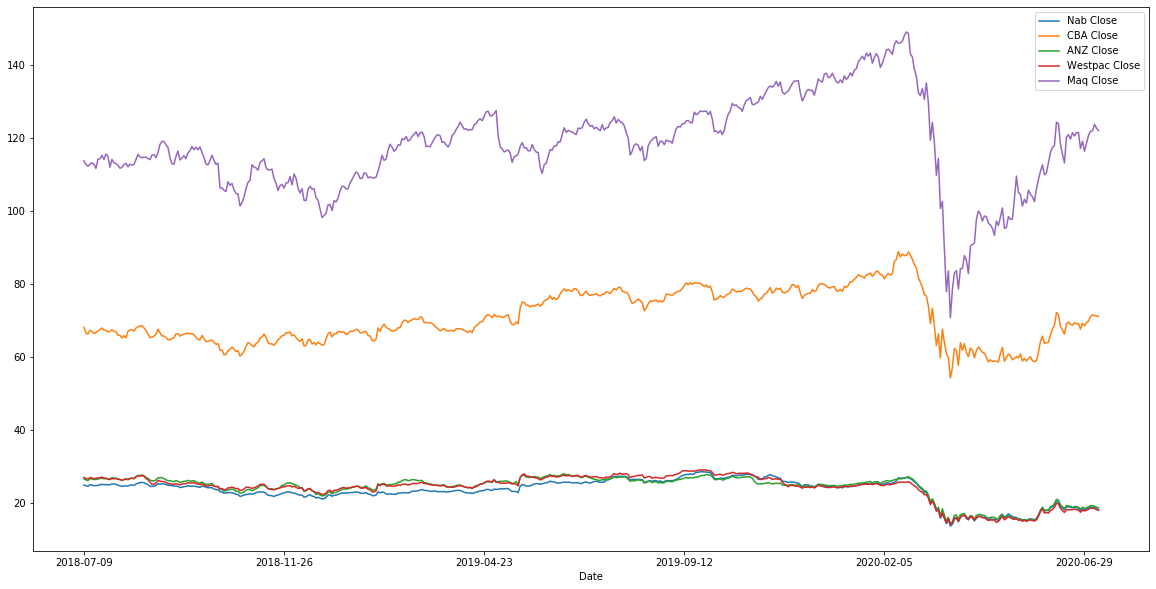

In [20]:

five_stk_d.plot("Date", figsize=(20,10))


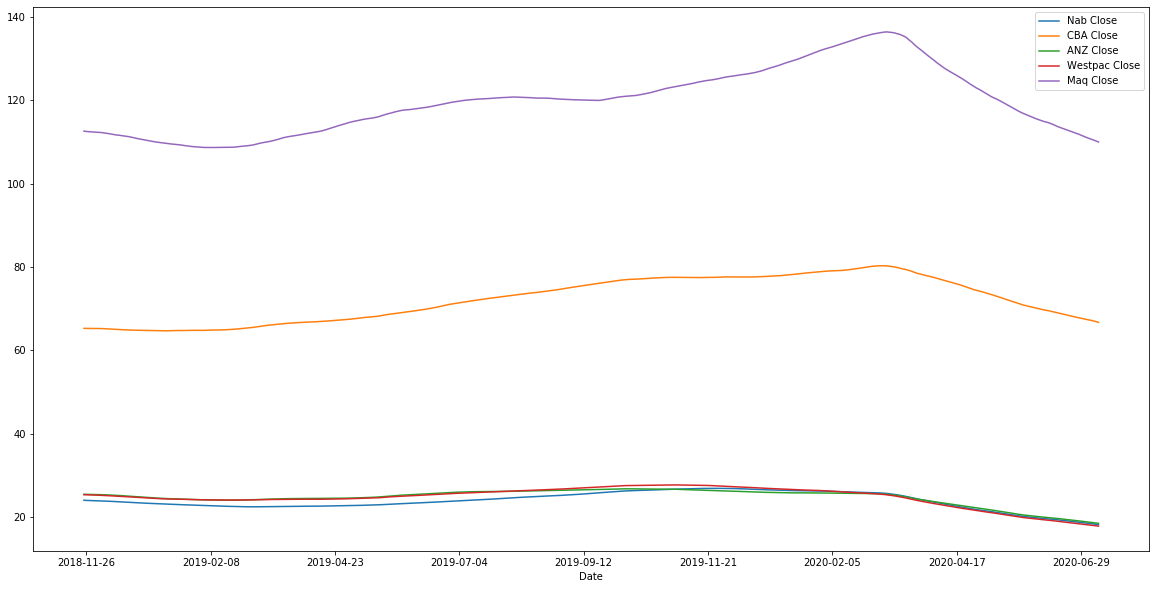

In [22]:
five_stk_d.set_index("Date").rolling(100).mean().plot(figsize=(20,10))